### LSTM for Time Series Forecasting

Libs required:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Bidirectional

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)

Using TensorFlow backend.


In [2]:
et0_train = pd.read_csv('./data/label_train.csv')
et0_val = pd.read_csv('./data/label_val.csv')

et0_train_ = pd.read_csv('./data/label_train_.csv')
et0_test = pd.read_csv('./data/label_test.csv')

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
def overfitting_plot(history):
    loss = history.history['loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend(loc='best')

In [24]:
n_steps = 3
n_features = 1

features, label = split_sequence(et0_train_.values, n_steps)
features = features.reshape((features.shape[0], features.shape[1], n_features))

In [25]:
for i in range(0,5):
    print("{}, {}\n".format(features[i], label[i]))

[[6.95434295]
 [9.08150375]
 [9.0281699 ]], [7.93418562]

[[9.08150375]
 [9.0281699 ]
 [7.93418562]], [7.70423053]

[[9.0281699 ]
 [7.93418562]
 [7.70423053]], [5.19487979]

[[7.93418562]
 [7.70423053]
 [5.19487979]], [5.58889656]

[[7.70423053]
 [5.19487979]
 [5.58889656]], [3.37520442]



In [53]:
model = Sequential()
model.add((LSTM(256,
                return_sequences=True,
                input_shape=(n_steps, n_features))))

#model.add((LSTM(32, return_sequences=True)))
#model.add((LSTM(32, return_sequences=True)))
#model.add((LSTM(32, return_sequences=True)))
model.add((LSTM(256)))
model.add(Dense(1))

In [54]:
model.compile(optimizer=Adam(lr=1e-3), 
              loss='mean_absolute_error', 
              metrics=['mae', 'mse'], )

In [58]:
history = model.fit(features,
                    label,
                    epochs=30, 
                    verbose=1)

Epoch 1/30
919/919 [==============================] - 1s 551us/step - loss: 1.2800 - mae: 1.2800 - mse: 2.6535
Epoch 2/30
919/919 [==============================] - 0s 540us/step - loss: 1.2605 - mae: 1.2605 - mse: 2.5779
Epoch 3/30
919/919 [==============================] - 0s 537us/step - loss: 1.2582 - mae: 1.2582 - mse: 2.5769
Epoch 4/30
919/919 [==============================] - 0s 537us/step - loss: 1.2618 - mae: 1.2618 - mse: 2.6037
Epoch 5/30
919/919 [==============================] - 1s 545us/step - loss: 1.2649 - mae: 1.2649 - mse: 2.5854
Epoch 6/30
919/919 [==============================] - 0s 530us/step - loss: 1.2651 - mae: 1.2651 - mse: 2.6004
Epoch 7/30
919/919 [==============================] - 0s 536us/step - loss: 1.2644 - mae: 1.2644 - mse: 2.5734
Epoch 8/30
919/919 [==============================] - 0s 538us/step - loss: 1.2505 - mae: 1.2505 - mse: 2.5401
Epoch 9/30
919/919 [==============================] - 0s 543us/step - loss: 1.2552 - mae: 1.2552 - mse: 2.5652
E

In [12]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse'])

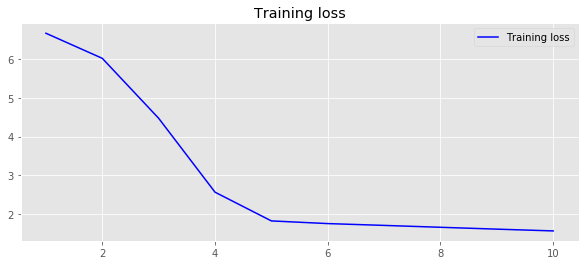

In [13]:
overfitting_plot(history)

In [59]:
features_test, label_test = split_sequence(et0_test.values, n_steps)
features_test = features_test.reshape((features_test.shape[0], features_test.shape[1], n_features))

In [60]:
model.evaluate(features_test, label_test)

228/228 [==============================] - 0s 530us/step


[1.3175890874444394, 1.3175891637802124, 2.8967716693878174]

In [63]:
np.sqrt(2.8967716693878174)

1.701990502143833